# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [2]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [3]:
set(y)

{0, 1, 2}

In [4]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

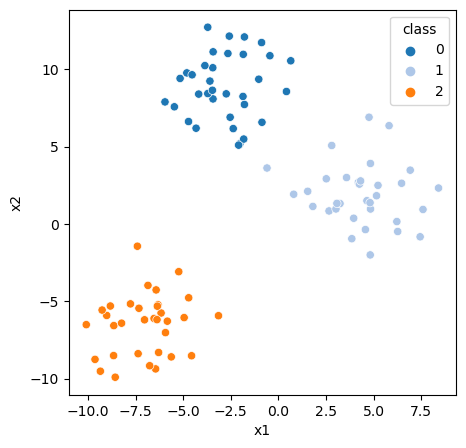

In [5]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [7]:
k = 3
n_samples, _ =X.shape
idx = np.random.choice(n_samples, k, replace=False)
centroids = X[idx, :]
idx

array([81, 93, 78])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [8]:
from scipy.spatial.distance import cdist
distances = cdist(X, centroids)
distances[0:5]

array([[16.18501625, 21.71391694, 20.93157946],
       [ 3.67456043,  6.85763952,  3.53603489],
       [10.92929148,  9.99035928, 14.18280668],
       [ 4.87637143,  7.36761044,  3.29775404],
       [11.64319147, 17.03465851, 16.66640349]])

## Step 3
Now assign each data point to the closest centroid

In [9]:
points = np.argmin(distances, axis=1)
points

array([0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [10]:
temp_centroids = []

for cluster in range(k):
   
    temp_cluster_centroid = np.mean(X[points == cluster], axis=0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)

# Step 5
Centroid change? Convergence

In [11]:
centroids, temp_centroids

(array([[3.07337225, 1.32904665],
        [5.81359302, 6.35408094],
        [8.41225064, 2.32232531]]),
 array([[-2.91477796, -1.50761308],
        [-1.46460582,  9.35467511],
        [ 7.04834979,  1.17170937]]))

In [12]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [25]:
def kmeans(X, k):
    k = 3
    n_samples, _ =X.shape
    idx = np.random.choice(n_samples, k, replace=False)
    centroids = X[idx, :]
    idx
    
    while True:
        distances = cdist(X, centroids)
        distances[0:5]

        points = np.argmin(distances, axis=1)
        points

        temp_centroids = []

        for cluster in range(k):
   
            temp_cluster_centroid = np.mean(X[points == cluster], axis=0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [26]:
k = 2
points, centroids = kmeans(X, k)

In [27]:
centroids

array([[-2.82641022,  8.85723525],
       [-7.02379204, -6.47232379],
       [ 4.35914117,  1.90467057]])

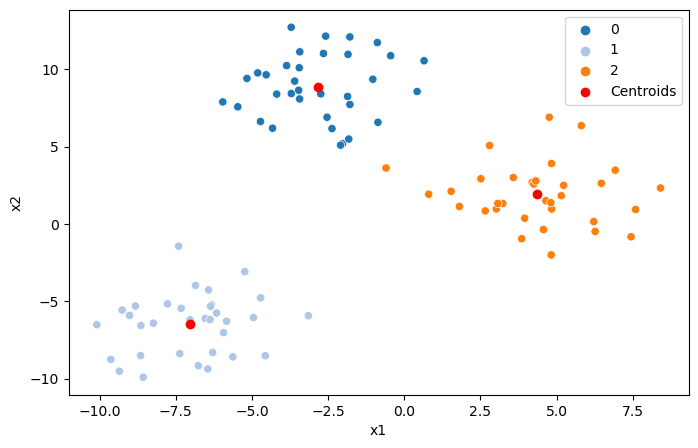

In [28]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [29]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
print("Points: ", kmeans.labels_)
# print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [31]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  2361.773515175247
Score:  -2361.7735151752468


In [32]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

# Plot Elbow Method

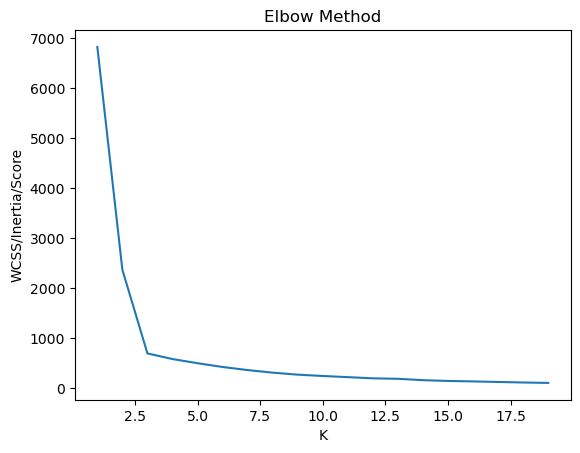

In [33]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()